In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
chat_df = pd.read_csv('chat_example.csv', index_col=0)

chat_df

In [ ]:
form_df = pd.read_csv('form_example.csv')
form_df

In [ ]:
both_df = pd.concat([form_df, chat_df])
both_df

In [58]:
form_text_len = [len(text.split(' ')) for text in form_df['text']]
chat_text_len = [len(text.split(' ')) for text in chat_df['text']]

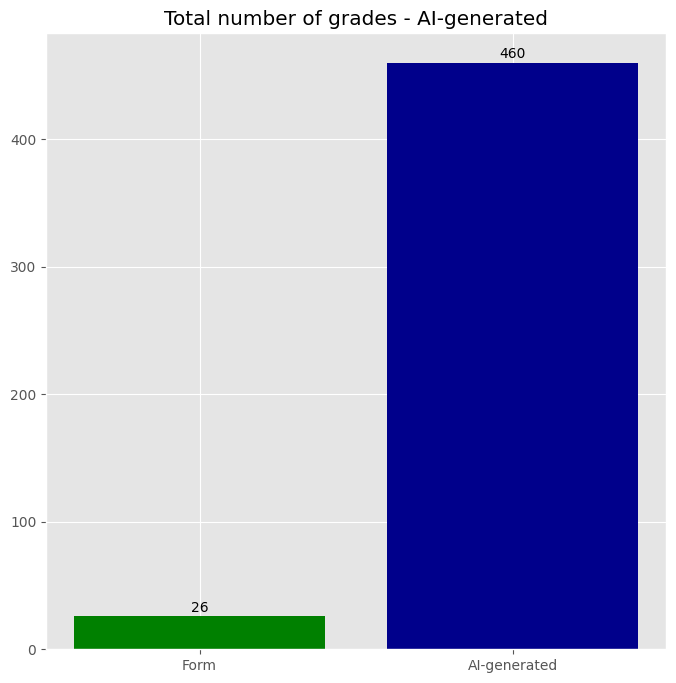

In [167]:
plt.figure(figsize=(8, 8))
bars = plt.bar(['Form', 'AI-generated'], [len(form_df), len(chat_df)], color=['green', 'darkblue'])
plt.title('Total number of grades - AI-generated')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 2), ha='center', va='bottom')


plt.show()

In [59]:
plt.style.use('ggplot')

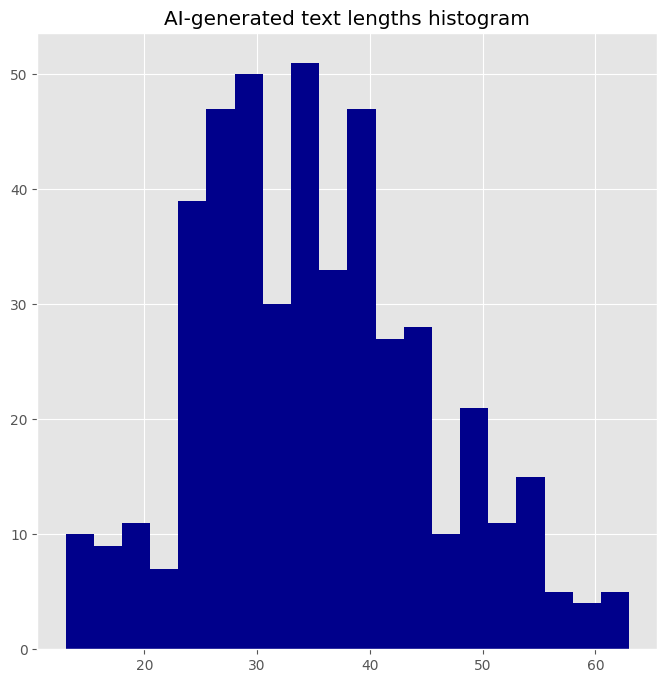

In [169]:
plt.figure(figsize=(8, 8))
plt.title('AI-generated text lengths histogram')
plt.hist(chat_text_len , bins=20, color='darkblue')
plt.show()

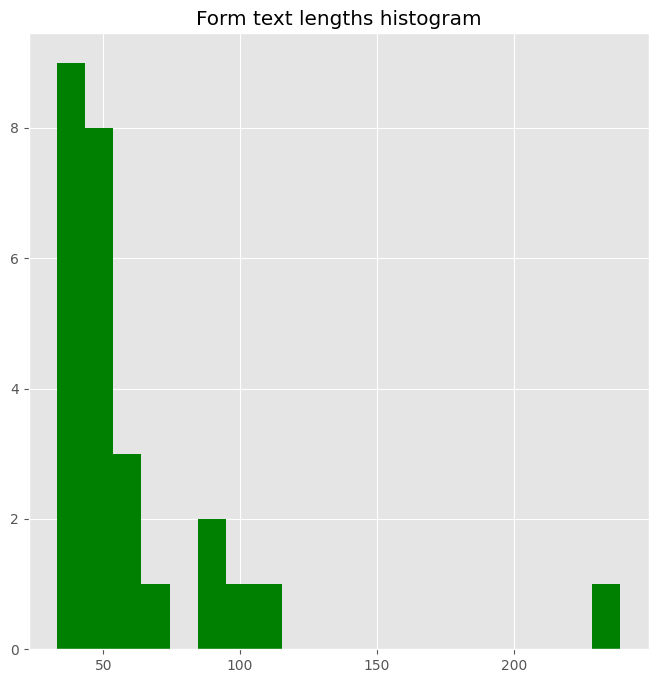

In [168]:
plt.figure(figsize=(8, 8))
plt.hist(form_text_len , bins=20, color='green')
plt.title('Form text lengths histogram')
plt.show()

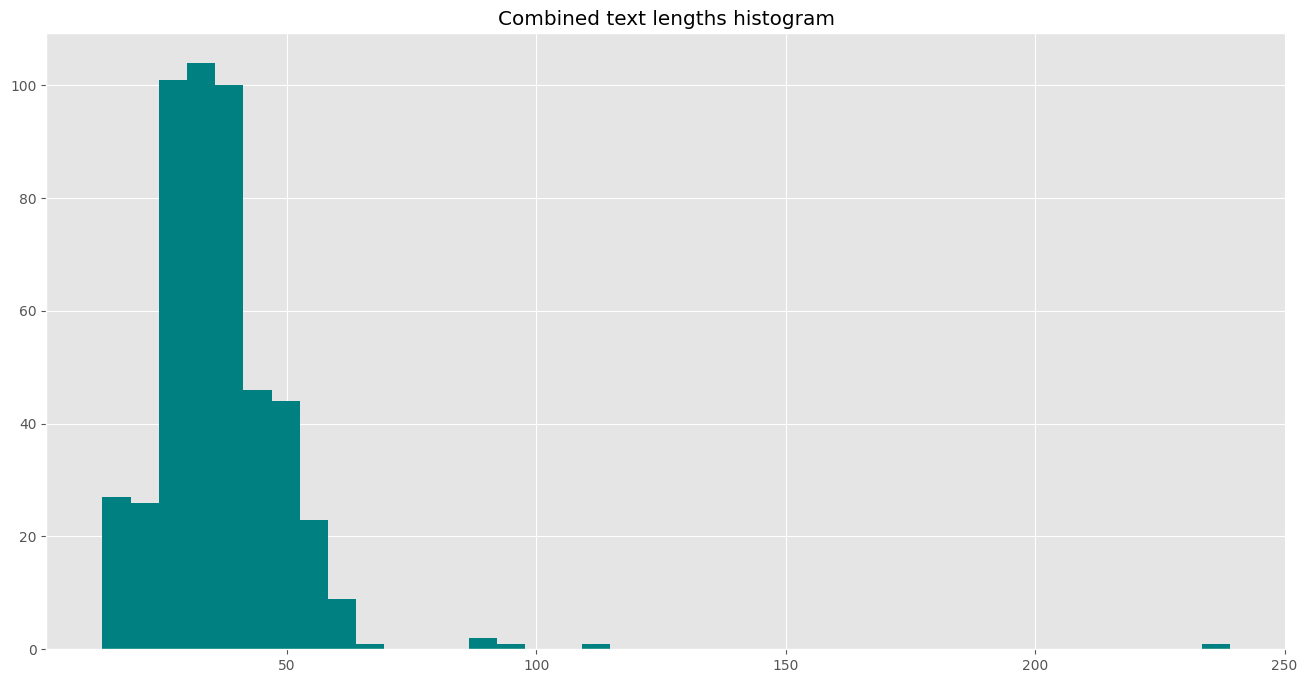

In [176]:
plt.figure(figsize=(16, 8))
plt.hist(chat_text_len+form_text_len , bins=40, color='teal')
plt.title('Combined text lengths histogram')
plt.show()

In [76]:
categories = list(both_df.columns)[2:]
categories[:3]

['amusement_parks', 'ferris_wheels', 'water_parks']

In [95]:
value_counts_chat_df = chat_df[categories].apply(pd.value_counts).fillna(0)
value_counts_chat_df

,amusement_parks,ferris_wheels,water_parks,miniature_parks,baths_and_saunas,climbing,stadiums,winter_sports,natural_springs,water,...,local_museums,national_museums,fashion_museums,planetariums,zoos,aquariums,skyscrapers,towers,historic_architecture,bridges
1,166,57,190,200,176,228,163,296,88,69,...,83,19,205,209,162,183,151,19,74,69
2,151,106,104,159,101,71,129,69,110,65,...,65,59,125,128,100,108,92,53,69,78
3,68,179,87,78,96,62,93,47,148,99,...,169,85,90,80,99,86,113,122,91,169
4,63,107,62,19,84,45,52,29,106,159,...,137,188,29,29,83,74,76,197,136,132
5,12,11,17,4,3,54,23,19,8,68,...,6,109,11,14,16,9,28,69,90,12


In [96]:
zeros = pd.DataFrame({category: [0] for category in categories})
zeros

,amusement_parks,ferris_wheels,water_parks,miniature_parks,baths_and_saunas,climbing,stadiums,winter_sports,natural_springs,water,...,local_museums,national_museums,fashion_museums,planetariums,zoos,aquariums,skyscrapers,towers,historic_architecture,bridges
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
value_counts_chat_df = pd.concat([zeros, value_counts_chat_df])
value_counts_chat_df

,amusement_parks,ferris_wheels,water_parks,miniature_parks,baths_and_saunas,climbing,stadiums,winter_sports,natural_springs,water,...,local_museums,national_museums,fashion_museums,planetariums,zoos,aquariums,skyscrapers,towers,historic_architecture,bridges
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,166,57,190,200,176,228,163,296,88,69,...,83,19,205,209,162,183,151,19,74,69
2,151,106,104,159,101,71,129,69,110,65,...,65,59,125,128,100,108,92,53,69,78
3,68,179,87,78,96,62,93,47,148,99,...,169,85,90,80,99,86,113,122,91,169
4,63,107,62,19,84,45,52,29,106,159,...,137,188,29,29,83,74,76,197,136,132
5,12,11,17,4,3,54,23,19,8,68,...,6,109,11,14,16,9,28,69,90,12


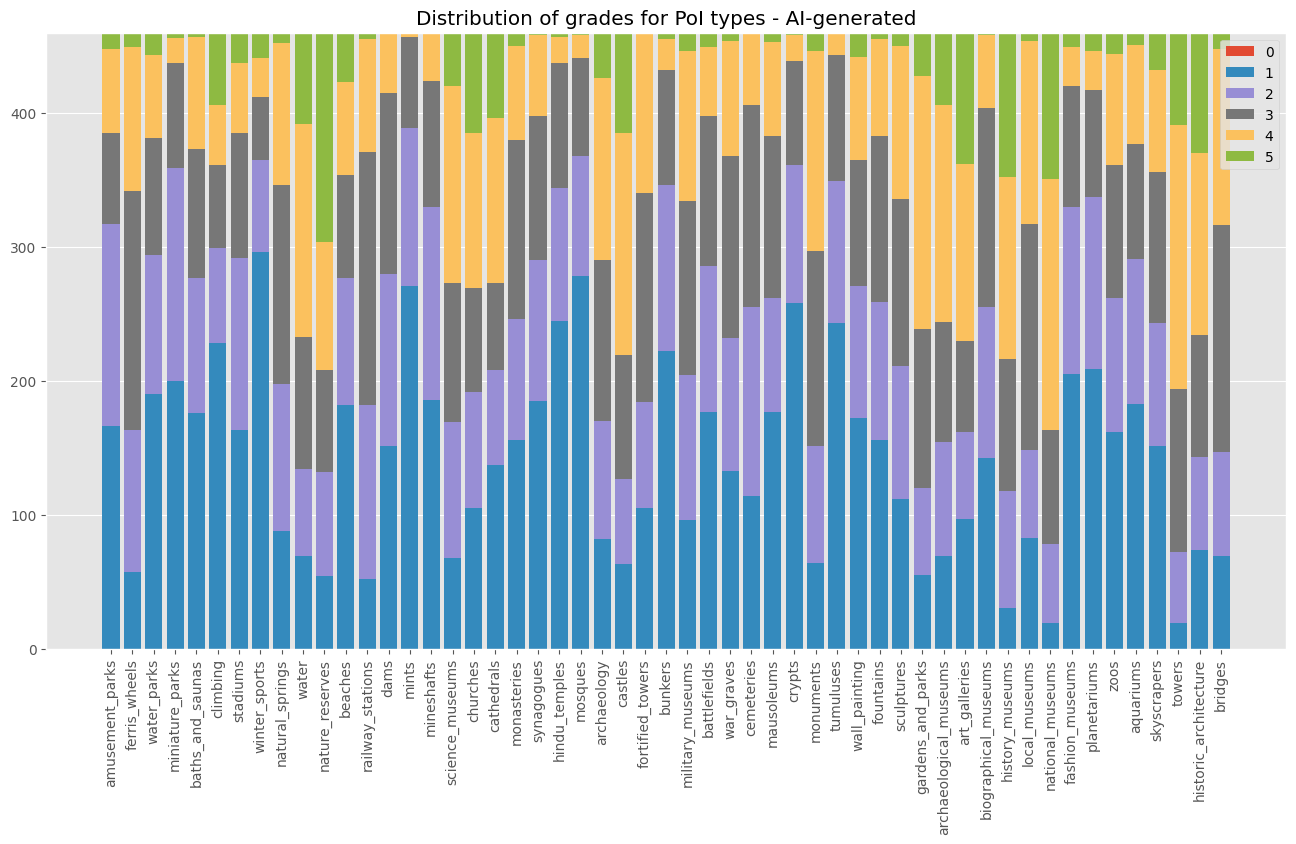

In [121]:
plt.figure(figsize=(16, 8))
plt.bar(categories, value_counts_chat_df.iloc[0], label=0)

for i in range(1, 6):
  plt.bar(categories, value_counts_chat_df.iloc[i], bottom=value_counts_chat_df.iloc[:i].sum(), label=i)

plt.title('Distribution of grades for PoI types - AI-generated')
plt.legend(loc='upper right')
plt.xticks(rotation='vertical')
plt.show()

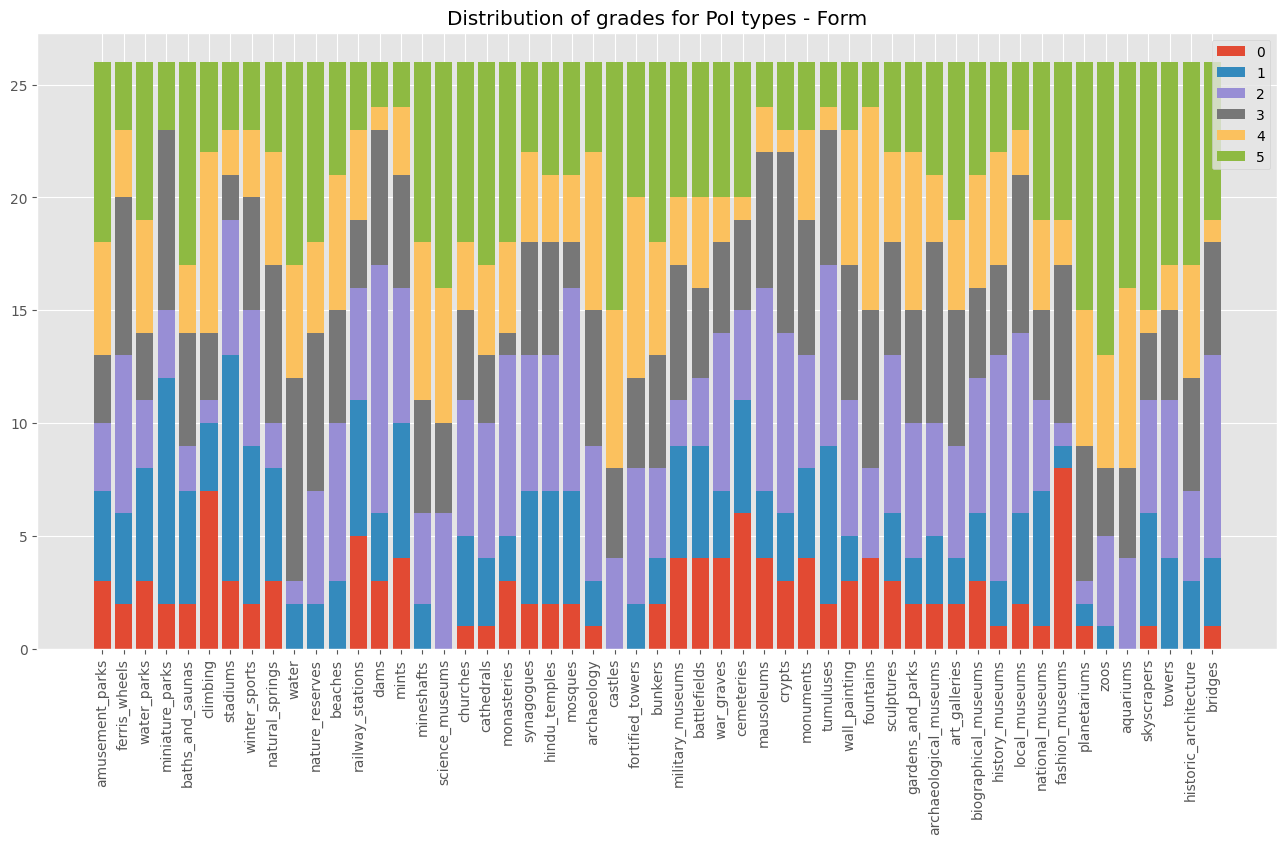

In [122]:
value_counts_form_df = form_df[categories].apply(pd.value_counts).fillna(0)

plt.figure(figsize=(16, 8))
plt.bar(categories, value_counts_form_df.iloc[0], label=0)

for i in range(1, 6):
  plt.bar(categories, value_counts_form_df.iloc[i], bottom=value_counts_form_df.iloc[:i].sum(), label=i)

plt.title('Distribution of grades for PoI types - Form')
plt.legend(loc='upper right')
plt.xticks(rotation='vertical')
plt.show()

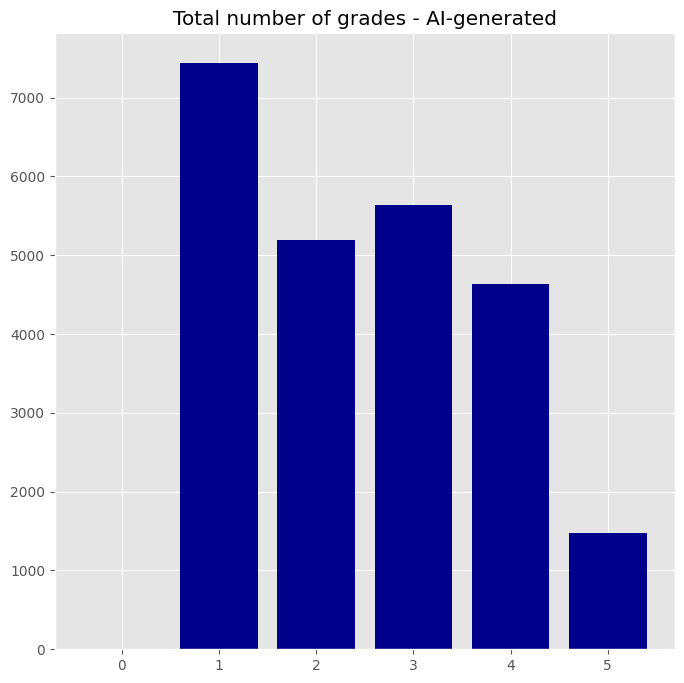

In [171]:
grades_num_chat = value_counts_chat_df.sum(axis=1)

plt.figure(figsize=(8, 8))
plt.bar(range(6), grades_num_chat, color='darkblue')
plt.title('Total number of grades - AI-generated')
plt.show()


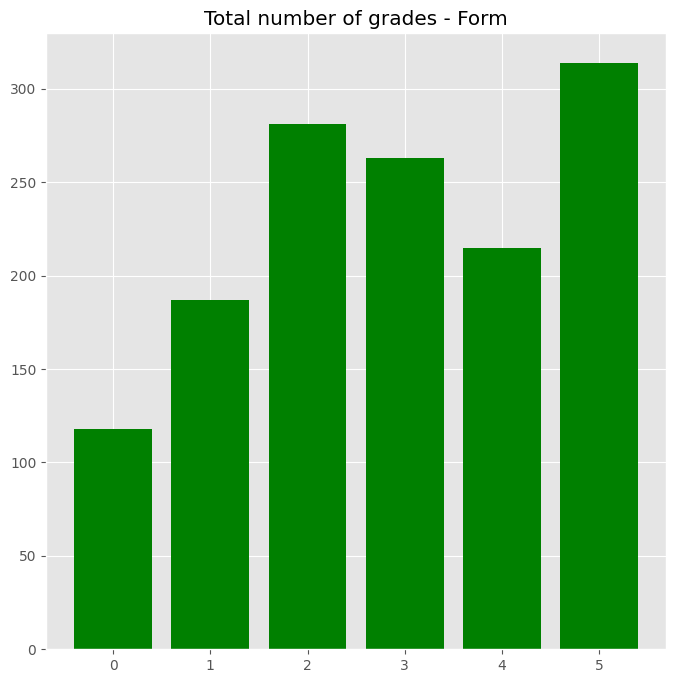

In [172]:
grades_num_form = value_counts_form_df.sum(axis=1)

plt.figure(figsize=(8, 8))
plt.bar(range(6), grades_num_form, color='green')
plt.title('Total number of grades - Form')
plt.show()

In [137]:
def convert_to_binary(df, cols):
  means = df[cols].mean(axis=1)
  pref_df = pd.DataFrame()

  for col in cols:
    pref_df[col] = df[col] >= means

  return pref_df.astype(int)

In [142]:
scaled_chat_df = convert_to_binary(chat_df, categories)
scaled_chat_df.head(3)

,amusement_parks,ferris_wheels,water_parks,miniature_parks,baths_and_saunas,climbing,stadiums,winter_sports,natural_springs,water,...,local_museums,national_museums,fashion_museums,planetariums,zoos,aquariums,skyscrapers,towers,historic_architecture,bridges
0,1,1,0,0,1,1,0,1,0,1,...,0,1,0,1,1,1,1,1,1,0
1,0,0,0,0,0,0,0,0,0,1,...,1,1,0,0,0,0,0,1,1,1
2,0,1,0,0,1,0,0,0,1,1,...,1,1,0,1,0,0,1,1,1,1


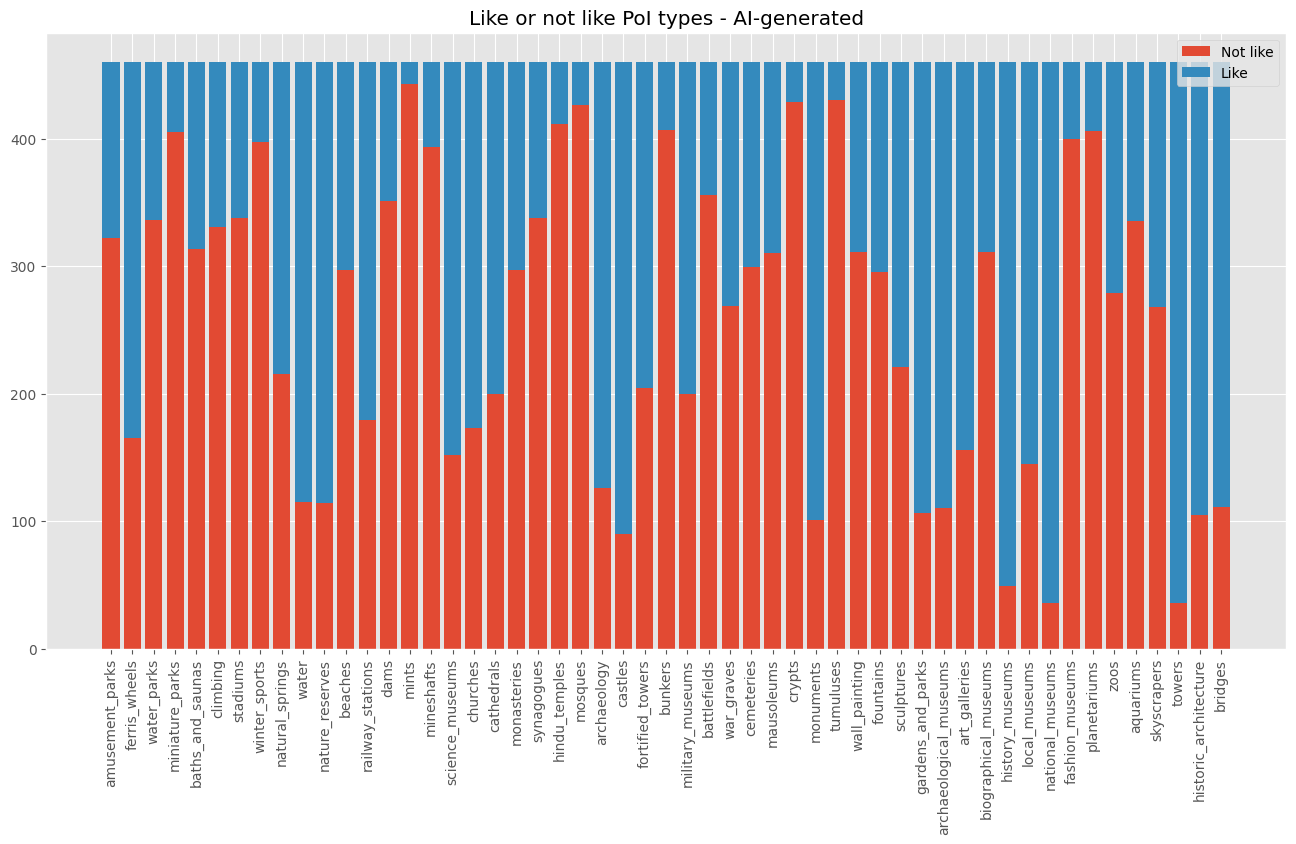

In [180]:
value_counts_scaled_chat_df = scaled_chat_df[categories].apply(pd.value_counts).fillna(0)

plt.figure(figsize=(16, 8))
plt.bar(categories, value_counts_scaled_chat_df.iloc[0], label='Not like')
plt.bar(categories, value_counts_scaled_chat_df.iloc[1], bottom=value_counts_scaled_chat_df.iloc[0], label='Like')

plt.title('Like or not like PoI types - AI-generated')
plt.legend(loc='upper right')
plt.xticks(rotation='vertical')
plt.show()

In [150]:
column_order = value_counts_scaled_chat_df.iloc[1].argsort()
sorted_value_counts_scaled_chat_df = value_counts_scaled_chat_df.iloc[:, column_order]
sorted_value_counts_scaled_chat_df

,mints,tumuluses,crypts,mosques,hindu_temples,bunkers,planetariums,miniature_parks,fashion_museums,winter_sports,...,nature_reserves,bridges,archaeological_museums,gardens_and_parks,historic_architecture,monuments,castles,history_museums,towers,national_museums
0,443,430,429,426,411,407,406,405,400,397,...,114,111,110,106,105,101,90,49,36,36
1,17,30,31,34,49,53,54,55,60,63,...,346,349,350,354,355,359,370,411,424,424


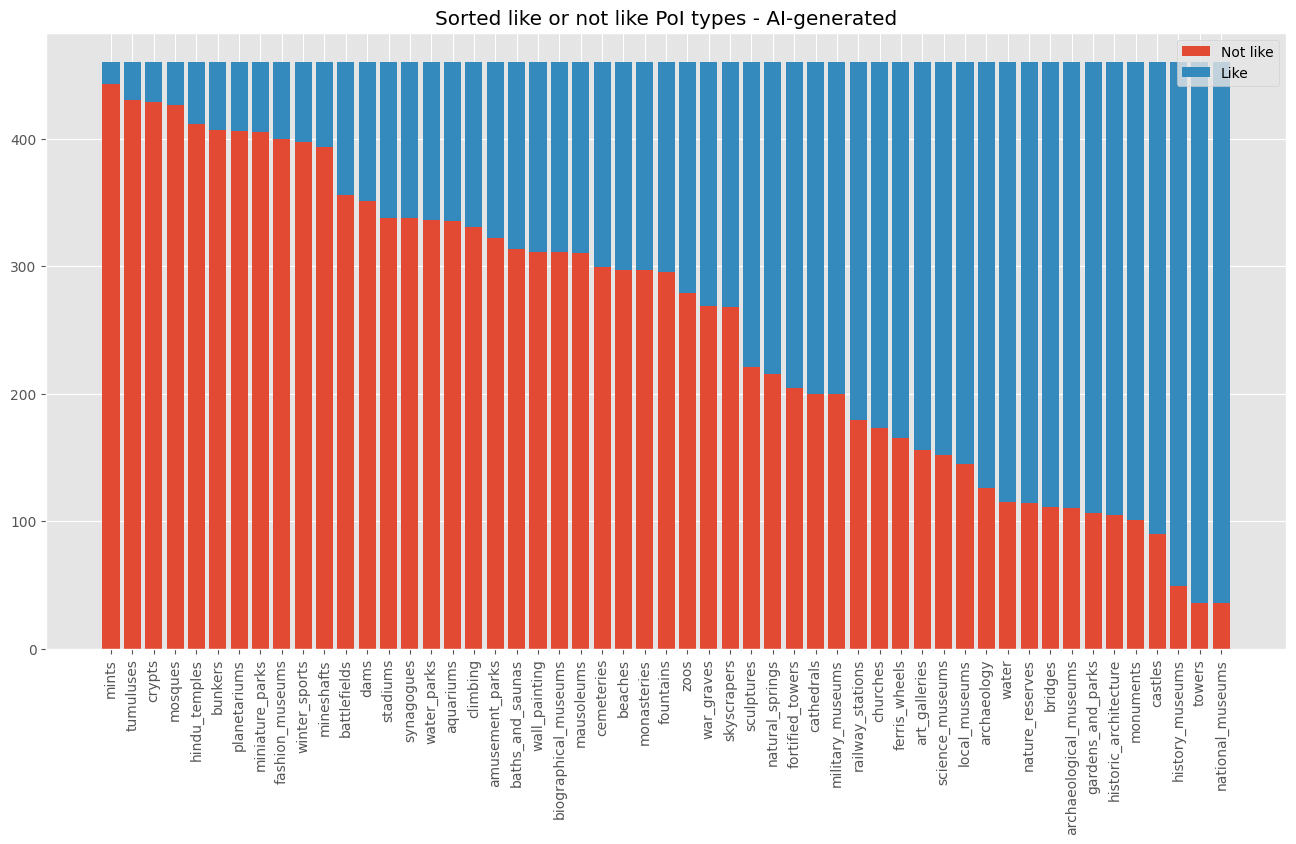

In [179]:
plt.figure(figsize=(16, 8))
plt.bar(sorted_value_counts_scaled_chat_df.columns, sorted_value_counts_scaled_chat_df.iloc[0], label='Not like')
plt.bar(sorted_value_counts_scaled_chat_df.columns, sorted_value_counts_scaled_chat_df.iloc[1], bottom=sorted_value_counts_scaled_chat_df.iloc[0], label='Like')

plt.title('Sorted like or not like PoI types - AI-generated')
plt.legend(loc='upper right')
plt.xticks(rotation='vertical')
plt.show()

In [141]:
scaled_form_df = convert_to_binary(form_df, categories)
scaled_form_df.head(3)

,amusement_parks,ferris_wheels,water_parks,miniature_parks,baths_and_saunas,climbing,stadiums,winter_sports,natural_springs,water,...,local_museums,national_museums,fashion_museums,planetariums,zoos,aquariums,skyscrapers,towers,historic_architecture,bridges
0,1,1,0,0,0,0,0,0,0,1,...,1,0,0,1,1,1,1,1,0,1
1,1,0,0,0,0,1,0,1,1,1,...,1,1,0,1,1,1,0,0,1,0
2,0,0,0,1,0,0,0,0,1,1,...,1,1,0,1,1,1,0,0,1,0


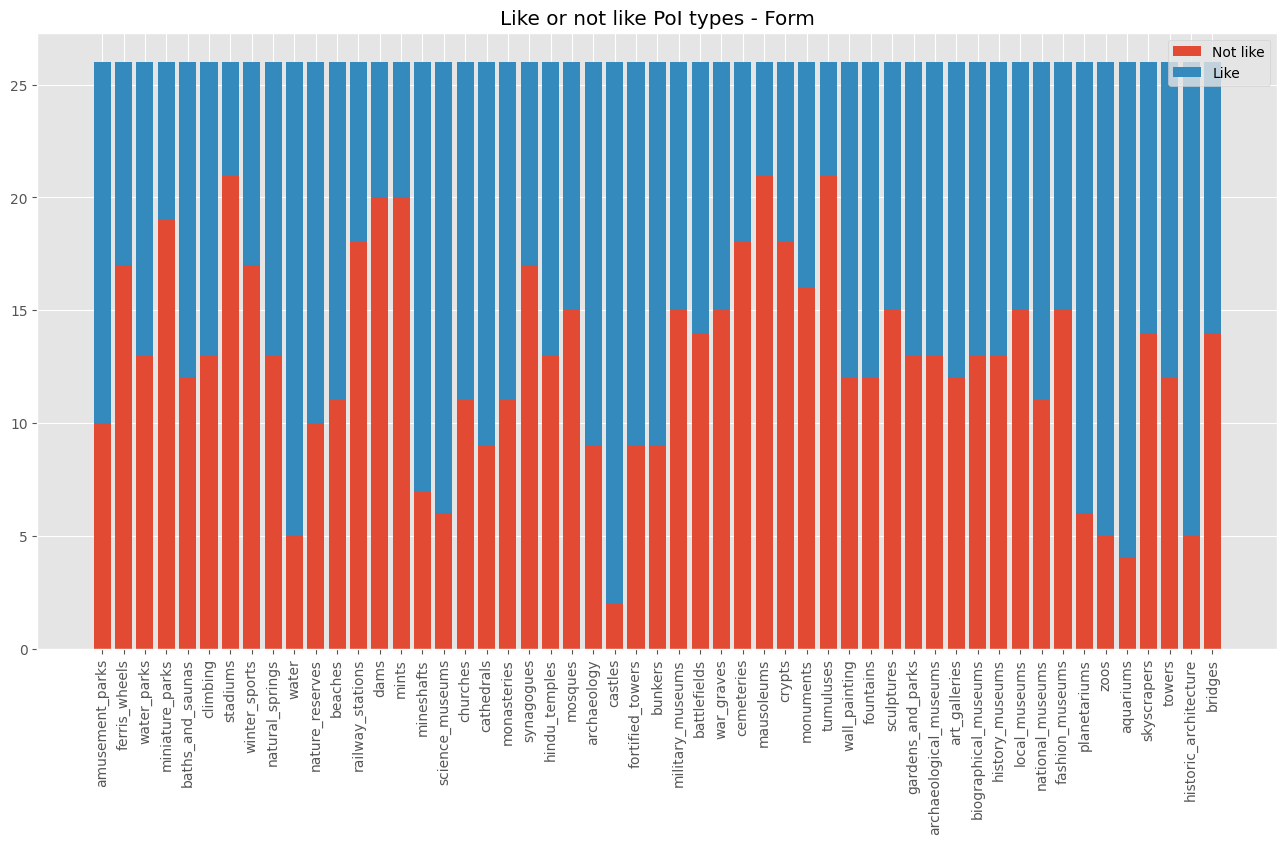

In [182]:
value_counts_scaled_form_df = scaled_form_df[categories].apply(pd.value_counts).fillna(0)

plt.figure(figsize=(16, 8))
plt.bar(categories, value_counts_scaled_form_df.iloc[0], label='Not like')
plt.bar(categories, value_counts_scaled_form_df.iloc[1], bottom=value_counts_scaled_form_df.iloc[0], label='Like')

plt.title('Like or not like PoI types - Form')
plt.legend(loc='upper right')
plt.xticks(rotation='vertical')
plt.show()

In [152]:
column_order = value_counts_scaled_form_df.iloc[1].argsort()
sorted_value_counts_scaled_form_df = value_counts_scaled_form_df.iloc[:, column_order]
sorted_value_counts_scaled_form_df

,tumuluses,stadiums,mausoleums,dams,mints,miniature_parks,cemeteries,crypts,railway_stations,ferris_wheels,...,cathedrals,bunkers,mineshafts,science_museums,planetariums,zoos,water,historic_architecture,aquariums,castles
0,21,21,21,20,20,19,18,18,18,17,...,9,9,7,6,6,5,5,5,4,2
1,5,5,5,6,6,7,8,8,8,9,...,17,17,19,20,20,21,21,21,22,24


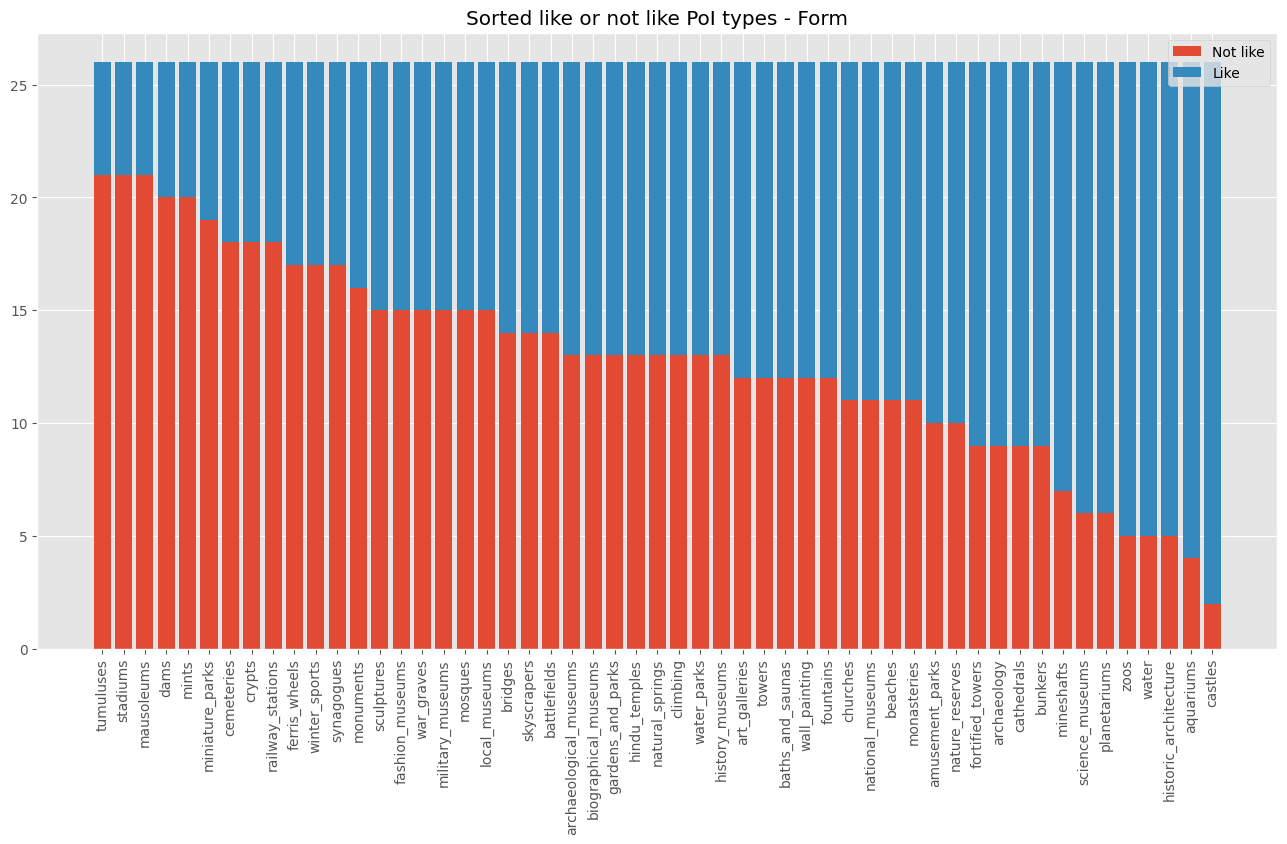

In [181]:
plt.figure(figsize=(16, 8))
plt.bar(sorted_value_counts_scaled_form_df.columns, sorted_value_counts_scaled_form_df.iloc[0], label='Not like')
plt.bar(sorted_value_counts_scaled_form_df.columns, sorted_value_counts_scaled_form_df.iloc[1], bottom=sorted_value_counts_scaled_form_df.iloc[0], label='Like')

plt.title('Sorted like or not like PoI types - Form')
plt.legend(loc='upper right')
plt.xticks(rotation='vertical')
plt.show()

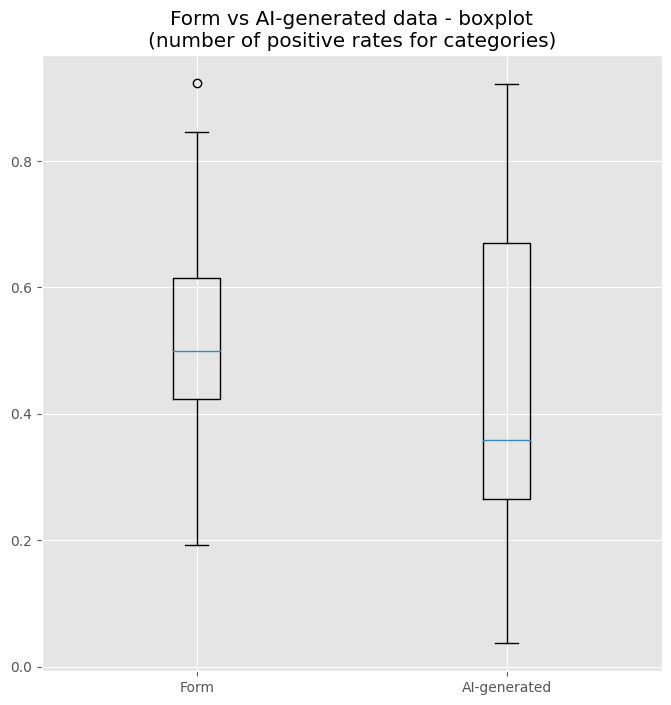

In [183]:
plt.figure(figsize=(8, 8))
plt.title('Form vs AI-generated data - boxplot\n(number of positive rates for categories)')
plt.boxplot([value_counts_scaled_form_df.iloc[1]/len(form_df), value_counts_scaled_chat_df.iloc[1]/len(chat_df)], labels=['Form', 'AI-generated'])
plt.show()